# Import Libraries

In [95]:
# Import our libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import from sklearn.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# PCA
from sklearn.decomposition import PCA


# Helper Functions

In [96]:
def quick_look(x):
    print(data[x].value_counts())
    print(f'\nMissing Values: {data[x].isna().sum()}')

# Import Data

In [97]:
data = pd.read_csv('./datasets/cleaned_data/shelters_with_stats.csv')

In [98]:
data.head()

,id,name,date_in,location,intake_type,condition,age_in,breed,color,date_out,...,breed_2,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
0,A047759,Oreo,2014-04-02 15:55:00,Austin (TX),surrender,normal,10.0,dachshund,Tricolor,2014-04-07 15:12:00,...,dachshund,1.0,0.500,26.0,40.0,7.000000,10.000000,16.000000,32.000000,4 days 23:17:00
1,A134067,Bandit,2013-11-16 09:02:00,12034 Research Blvd in Austin (TX),public_assist,injured,16.0,shetland sheepdog,Brown/White,2013-11-16 11:54:00,...,shetland sheepdog,1.0,0.950,1.0,4.0,17.941176,20.908497,42.934641,57.522876,0 days 02:52:00
2,A141142,Bettie,2013-11-16 14:46:00,Austin (TX),stray,aged,15.0,labrador retriever/pit bull,Black/White,2013-11-17 11:40:00,...,pit bull,0.0,0.825,8.5,14.5,19.000000,21.500000,47.500000,65.000000,0 days 20:54:00
3,A163459,Sasha,2014-11-14 15:11:00,Ih 35 And 41St St in Austin (TX),stray,normal,15.0,miniature schnauzer,Black/Gray,2014-11-14 19:28:00,...,miniature schnauzer,1.0,0.850,5.0,15.0,17.941176,20.908497,42.934641,57.522876,0 days 04:17:00
4,A165752,Pep,2014-09-15 11:28:00,Gatlin Gun Rd And Brodie in Austin (TX),stray,normal,15.0,lhasa apso,Brown/White,2014-09-15 16:35:00,...,lhasa apso,1.0,0.300,41.0,80.0,17.941176,20.908497,42.934641,57.522876,0 days 05:07:00


In [99]:
data.dropna(inplace=True)

In [100]:
data.columns

Index(['id', 'name', 'date_in', 'location', 'intake_type', 'condition',
       'age_in', 'breed', 'color', 'date_out', 'dob', 'outcome', 'age_out',
       'sex', 'intact_in', 'intact_out', 'age', 'primary_color',
       'secondary_color', 'breed_1', 'breed_2', 'pure', 'obey', 'reps_lower',
       'reps_upper', 'height_low_inches', 'height_high_inches',
       'weight_low_lbs', 'weight_high_lbs', 'time_in_shelter'],
      dtype='object')

In [101]:
data.head()

,id,name,date_in,location,intake_type,condition,age_in,breed,color,date_out,...,breed_2,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
0,A047759,Oreo,2014-04-02 15:55:00,Austin (TX),surrender,normal,10.0,dachshund,Tricolor,2014-04-07 15:12:00,...,dachshund,1.0,0.500,26.0,40.0,7.000000,10.000000,16.000000,32.000000,4 days 23:17:00
1,A134067,Bandit,2013-11-16 09:02:00,12034 Research Blvd in Austin (TX),public_assist,injured,16.0,shetland sheepdog,Brown/White,2013-11-16 11:54:00,...,shetland sheepdog,1.0,0.950,1.0,4.0,17.941176,20.908497,42.934641,57.522876,0 days 02:52:00
2,A141142,Bettie,2013-11-16 14:46:00,Austin (TX),stray,aged,15.0,labrador retriever/pit bull,Black/White,2013-11-17 11:40:00,...,pit bull,0.0,0.825,8.5,14.5,19.000000,21.500000,47.500000,65.000000,0 days 20:54:00
3,A163459,Sasha,2014-11-14 15:11:00,Ih 35 And 41St St in Austin (TX),stray,normal,15.0,miniature schnauzer,Black/Gray,2014-11-14 19:28:00,...,miniature schnauzer,1.0,0.850,5.0,15.0,17.941176,20.908497,42.934641,57.522876,0 days 04:17:00
4,A165752,Pep,2014-09-15 11:28:00,Gatlin Gun Rd And Brodie in Austin (TX),stray,normal,15.0,lhasa apso,Brown/White,2014-09-15 16:35:00,...,lhasa apso,1.0,0.300,41.0,80.0,17.941176,20.908497,42.934641,57.522876,0 days 05:07:00


In [102]:
data.drop(columns=['id', 'name', 'date_in', 'location', 'color', 'date_out', 'dob', 'intact_in'], inplace=True)


In [106]:
data['time_in_shelter'] = pd.to_timedelta(data['time_in_shelter'])
data['time_in_shelter'] = data['time_in_shelter'].dt.days

In [107]:
data['time_in_shelter'].mean()

16.30558975621768

In [108]:
data.head()

,intake_type,condition,age_in,breed,outcome,age_out,sex,intact_out,age,primary_color,...,breed_2,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
0,surrender,normal,10.0,dachshund,transfer,10.0,1,0,Senior,tricolor,...,dachshund,1.0,0.500,26.0,40.0,7.000000,10.000000,16.000000,32.000000,4
1,public_assist,injured,16.0,shetland sheepdog,return_owner,16.0,1,0,Senior,brown,...,shetland sheepdog,1.0,0.950,1.0,4.0,17.941176,20.908497,42.934641,57.522876,0
2,stray,aged,15.0,labrador retriever/pit bull,return_owner,15.0,0,0,Senior,black,...,pit bull,0.0,0.825,8.5,14.5,19.000000,21.500000,47.500000,65.000000,0
3,stray,normal,15.0,miniature schnauzer,return_owner,15.0,0,1,Senior,black,...,miniature schnauzer,1.0,0.850,5.0,15.0,17.941176,20.908497,42.934641,57.522876,0
4,stray,normal,15.0,lhasa apso,return_owner,15.0,1,0,Senior,brown,...,lhasa apso,1.0,0.300,41.0,80.0,17.941176,20.908497,42.934641,57.522876,0


<AxesSubplot:>

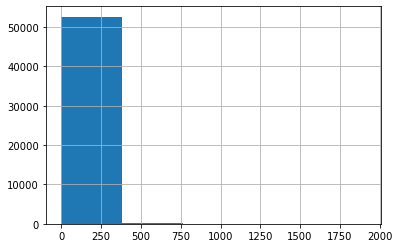

In [110]:
data['time_in_shelter'].hist(bins=5)

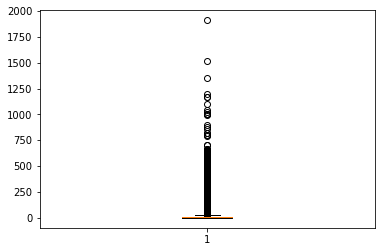

In [109]:
plt.boxplot(x=data['time_in_shelter']);

<AxesSubplot:>

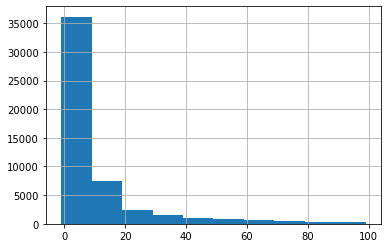

In [113]:
data[data['time_in_shelter'] < 100]['time_in_shelter'].hist()

In [112]:
data[data['time_in_shelter'] > 200].sort_values(by=['time_in_shelter'], ascending=False)[['intake_type', 'condition', 'breed', 'outcome', 'age_out', 'age', 'time_in_shelter']][:20]

,intake_type,condition,breed,outcome,age_out,age,time_in_shelter
1881,stray,injured,pit bull,adoption,11.0,Senior,1912
19797,surrender,normal,pit bull,adoption,5.0,Adult,1521
23574,stray,normal,labrador retriever,transfer,6.0,Adult,1351
35000,surrender,normal,pit bull,adoption,11.0,Senior,1195
32610,stray,normal,boxer,adoption,13.0,Senior,1167
32611,stray,normal,american staffordshire terrier,adoption,13.0,Senior,1167
31654,surrender,normal,pit bull,adoption,7.0,Adult,1105
38662,stray,normal,bulldog/boxer,adoption,10.0,Senior,1047
15946,stray,normal,labrador retriever,adoption,10.0,Senior,1026
13830,stray,normal,labrador retriever,adoption,12.0,Senior,1009


In [16]:
quick_look('intake_type')

stray            39006
surrender         9108
public_assist     4269
abandoned          246
euth_request       164
Name: intake_type, dtype: int64

Missing Values: 0


In [45]:
data.groupby('intake_type').mean()['time_in_shelter']

intake_type
abandoned        15.308943
euth_request      3.274390
public_assist    14.012181
stray            15.629313
surrender        20.538318
Name: time_in_shelter, dtype: float64

In [49]:
data['intake_type'].value_counts(normalize=True)

stray            0.738848
surrender        0.172523
public_assist    0.080863
abandoned        0.004660
euth_request     0.003106
Name: intake_type, dtype: float64

In [29]:
data.groupby(by='intake_type').mean()

,age_out,sex,intact_out,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
intake_type,,,,,,,,,,,,
abandoned,1.321138,0.491870,0.345528,0.796748,0.676520,17.822738,30.880946,17.434601,20.380427,43.202628,57.326133,15.308943
euth_request,8.286585,0.567073,0.402439,0.859756,0.687796,18.242021,30.306608,16.786765,19.809561,42.255958,54.903555,3.274390
public_assist,3.554931,0.583041,0.345748,0.863200,0.633160,21.531626,35.722647,15.976351,18.759529,38.589077,50.564495,14.012181
stray,2.362226,0.530918,0.273291,0.852253,0.636755,21.189157,35.736695,16.036061,18.948275,38.490646,51.212884,15.629313
surrender,2.749890,0.495169,0.237923,0.801713,0.627176,21.928161,36.842166,15.689541,18.565229,37.490178,50.159548,20.538318


In [32]:
quick_look('outcome')

adoption        24191
transfer        13964
return_owner    12775
euthanasia       1537
died              267
disposal           41
missing            18
Name: outcome, dtype: int64

Missing Values: 0


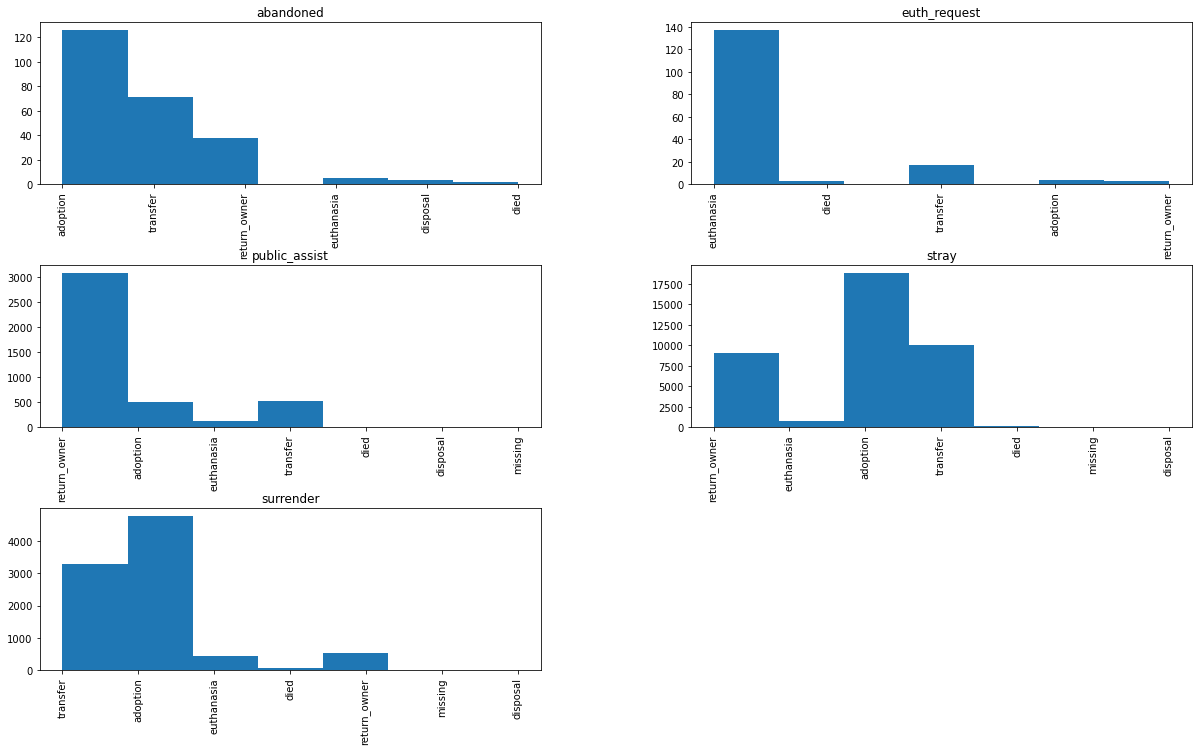

In [44]:
data['outcome'].hist(by=data['intake_type'], figsize=(20,12), bins=7);

In [9]:
quick_look('sex')

1.0    58049
0.0    46445
Name: sex, dtype: int64

Missing Values: 0


In [50]:
data.groupby('sex').mean()['time_in_shelter']

sex
0    16.433718
1    16.191462
Name: time_in_shelter, dtype: float64

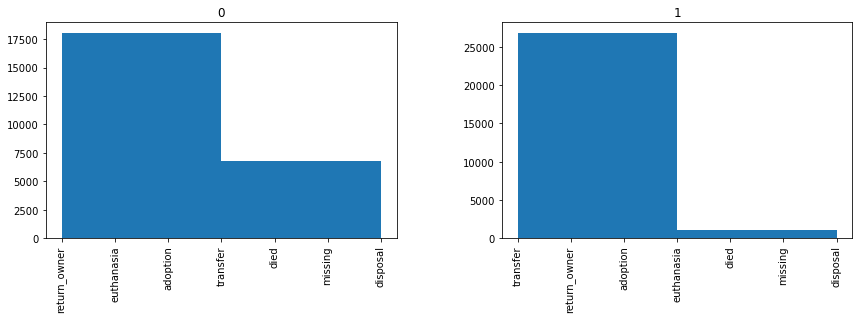

In [59]:
data['outcome'].hist(by=data['sex'], figsize=(14,4), bins=2);

In [60]:
data.head()

,intake_type,condition,breed,outcome,age_out,sex,intact_out,age,primary_color,secondary_color,...,breed_2,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
0,surrender,normal,dachshund,transfer,10.0,1,0,Senior,tricolor,tricolor,...,dachshund,1.0,0.500,26.0,40.0,7.000000,10.000000,16.000000,32.000000,4
1,public_assist,injured,shetland sheepdog,return_owner,16.0,1,0,Senior,brown,white,...,shetland sheepdog,1.0,0.950,1.0,4.0,17.941176,20.908497,42.934641,57.522876,0
2,stray,aged,labrador retriever/pit bull,return_owner,15.0,0,0,Senior,black,white,...,pit bull,0.0,0.825,8.5,14.5,19.000000,21.500000,47.500000,65.000000,0
3,stray,normal,miniature schnauzer,return_owner,15.0,0,1,Senior,black,gray,...,miniature schnauzer,1.0,0.850,5.0,15.0,17.941176,20.908497,42.934641,57.522876,0
4,stray,normal,lhasa apso,return_owner,15.0,1,0,Senior,brown,white,...,lhasa apso,1.0,0.300,41.0,80.0,17.941176,20.908497,42.934641,57.522876,0


In [64]:
data.groupby('age').mean()['time_in_shelter'].sort_values()

age
Baby      10.524575
Young     14.996593
Adult     19.938885
Senior    21.477122
Name: time_in_shelter, dtype: float64

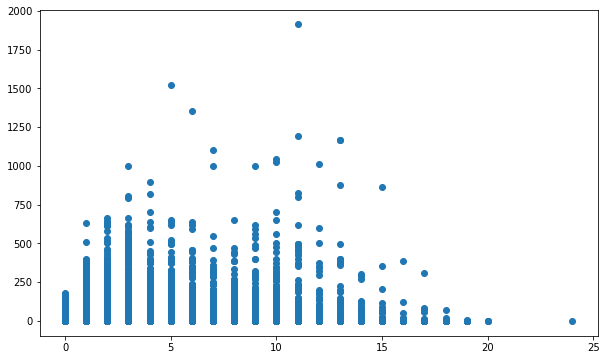

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(x=data['age_out'], y=data['time_in_shelter'])

In [114]:
data.describe()

,age_in,age_out,sex,intact_out,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,time_in_shelter
count,52793.000000,52793.000000,52793.000000,52793.000000,52793.000000,52793.000000,52793.000000,52793.000000,52793.000000,52793.000000,52793.000000,52793.000000,52793.000000
mean,2.506829,2.539106,0.528896,0.273786,0.844184,0.635156,21.319503,35.886783,15.980299,18.876277,38.359655,51.018680,16.305590
std,3.164678,3.181899,0.499169,0.445905,0.362684,0.260480,19.522003,29.671460,6.119823,6.499101,25.561906,32.416399,45.866732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,1.000000,4.000000,6.000000,8.000000,2.000000,5.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,1.000000,4.000000,10.000000,13.000000,16.000000,20.000000,2.000000
50%,1.000000,1.000000,1.000000,0.000000,1.000000,0.700000,16.000000,25.000000,17.000000,19.954248,40.000000,50.000000,5.000000
75%,3.000000,3.000000,1.000000,1.000000,1.000000,0.950000,33.500000,52.500000,21.000000,24.000000,55.000000,80.000000,11.000000
max,24.000000,24.000000,1.000000,1.000000,1.000000,0.950000,81.000000,100.000000,48.000000,66.000000,175.000000,190.000000,1912.000000


In [135]:
data[data['time_in_shelter'] <= 1]['outcome'].value_counts(normalize=True).cumsum()

return_owner    0.614429
transfer        0.872109
euthanasia      0.934588
adoption        0.989386
died            0.998706
disposal        0.999914
missing         1.000000
Name: outcome, dtype: float64

In [134]:
data[data['time_in_shelter'] <= 2]['outcome'].value_counts(normalize=True).cumsum()

return_owner    0.589027
transfer        0.845701
adoption        0.934062
euthanasia      0.990050
died            0.998739
disposal        0.999790
missing         1.000000
Name: outcome, dtype: float64

In [133]:
data[data['time_in_shelter'] <= 3]['outcome'].value_counts(normalize=True).cumsum()

return_owner    0.520413
transfer        0.803146
adoption        0.938705
euthanasia      0.989399
died            0.998590
disposal        0.999774
missing         1.000000
Name: outcome, dtype: float64

Going to exclude dogs that have been in the system for only 1 day. They appear to be lost dogs returned to the owner or transfered out the same day.

# PCA

In [115]:
y = data['time_in_shelter']
X = data.drop(columns=['time_in_shelter'])

In [116]:
y.head()

0    4
1    0
2    0
3    0
4    0
Name: time_in_shelter, dtype: int64

In [12]:
X.head()

,sex,age_in,intake_type,condition,intact_out,primary_color,breed_1,pure,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,1.0,10.0,surrender,wnl,0.0,tricolor,dachshund,1.0,0.500,26.0,40.0,7.000000,10.000000,16.000000,32.000000
1,1.0,16.0,public_assist,med_attn,0.0,brown,shetland sheepdog,1.0,0.950,1.0,4.0,17.941176,20.908497,42.934641,57.522876
2,0.0,15.0,stray,aged,0.0,black,labrador retriever,0.0,0.825,8.5,14.5,19.000000,21.500000,47.500000,65.000000
3,0.0,15.0,stray,wnl,1.0,black,miniature schnauzer,1.0,0.850,5.0,15.0,17.941176,20.908497,42.934641,57.522876
4,1.0,15.0,stray,wnl,0.0,brown,lhasa apso,1.0,0.300,41.0,80.0,17.941176,20.908497,42.934641,57.522876


Baseline in days

In [13]:
(y/86400).mean()

115.26713810521883

In [14]:
quick_look('intake_type')

stray            67928
surrender        25501
public_assist    10538
abandoned          339
euth_request       188
Name: intake_type, dtype: int64

Missing Values: 0


In [15]:
quick_look('condition')

wnl             95990
med_attn         6378
preg_nursing     1388
aged              470
other             155
behavioral         60
underage           53
Name: condition, dtype: int64

Missing Values: 0


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104494 entries, 0 to 104493
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   sex                 104494 non-null  float64
 1   age_in              104494 non-null  float64
 2   intake_type         104494 non-null  object 
 3   condition           104494 non-null  object 
 4   intact_out          104494 non-null  float64
 5   primary_color       104494 non-null  object 
 6   breed_1             104494 non-null  object 
 7   pure                104494 non-null  float64
 8   obey                104494 non-null  float64
 9   reps_lower          104494 non-null  float64
 10  reps_upper          104494 non-null  float64
 11  height_low_inches   104494 non-null  float64
 12  height_high_inches  104494 non-null  float64
 13  weight_low_lbs      104494 non-null  float64
 14  weight_high_lbs     104494 non-null  float64
dtypes: float64(11), object(4)
memory u

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234)

In [18]:
pd.get_dummies(X['breed_1'])

,affenpinscher,afghan hound,airedale terrier,akita,alaskan malamute,american eskimo,american foxhound,american pit bull terrier,american staffordshire terrier,anatolian sheepdog,...,toy fox terrier,toy poodle,vizsla,weimaraner,welsh springer spaniel,welsh terrier,west highland white terrier,whippet,wirehaired pointing griffon,yorkshire terrier
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
pd.concat([
    X, 
    pd.get_dummies(X['breed_1']), 
    pd.get_dummies(X['primary_color'], prefix='color'), 
    pd.get_dummies(X['condition'], prefix='condition'), 
    pd.get_dummies(X['intake_type'], prefix='intake')
    ], axis=1)

,sex,age_in,intake_type,condition,intact_out,primary_color,breed_1,pure,obey,reps_lower,...,condition_med_attn,condition_other,condition_preg_nursing,condition_underage,condition_wnl,intake_abandoned,intake_euth_request,intake_public_assist,intake_stray,intake_surrender
0,1.0,10.0,surrender,wnl,0.0,tricolor,dachshund,1.0,0.500,26.0,...,0,0,0,0,1,0,0,0,0,1
1,1.0,16.0,public_assist,med_attn,0.0,brown,shetland sheepdog,1.0,0.950,1.0,...,1,0,0,0,0,0,0,1,0,0
2,0.0,15.0,stray,aged,0.0,black,labrador retriever,0.0,0.825,8.5,...,0,0,0,0,0,0,0,0,1,0
3,0.0,15.0,stray,wnl,1.0,black,miniature schnauzer,1.0,0.850,5.0,...,0,0,0,0,1,0,0,0,1,0
4,1.0,15.0,stray,wnl,0.0,brown,lhasa apso,1.0,0.300,41.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104489,1.0,1.0,surrender,wnl,0.0,tricolor,basenji,1.0,0.100,81.0,...,0,0,0,0,1,0,0,0,0,1
104490,1.0,2.0,public_assist,wnl,0.0,black,german shepherd,1.0,0.950,1.0,...,0,0,0,0,1,0,0,1,0,0
104491,1.0,2.0,public_assist,wnl,0.0,black,german shepherd,1.0,0.950,1.0,...,0,0,0,0,1,0,0,1,0,0
104492,1.0,2.0,surrender,wnl,0.0,black,german shepherd,1.0,0.950,1.0,...,0,0,0,0,1,0,0,0,0,1


In [85]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

ValueError: could not convert string to float: 'surrender'